Dataset: 
https://www.kaggle.com/datasets/puneetbhaya/online-retail 

1. Do customer segmentation/ clustering (you can get help from 2nd link in self-study) 

2. Describe each group's behaviors

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
data = pd.read_excel('data/Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [122]:
data.shape

(541909, 8)

In [123]:
#removing duplicates
data = data.drop_duplicates()

In [124]:
# removing null value
data = data[~data["CustomerID"].isnull()]

In [125]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [126]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [127]:
data.Country.value_counts()

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [128]:
new_data = data[data.Country=='United Kingdom']
new_data.shape

(356728, 8)

In [129]:
new_data.describe()

,Quantity,UnitPrice,CustomerID
count,356728.000000,356728.000000,356728.000000
mean,11.198644,3.268255,15543.795284
std,264.998044,71.162330,1594.286219
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14191.000000
50%,4.000000,1.950000,15513.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


## RFM Analysis
We will cluster customer based on their RFM score.
where RFM describes, 

    ~ Recency, difference between present date and last date of purchase
    ~ Frequency, number of order purchased
    ~ Monetary, total price of puchased order

In [130]:
new_data['TotalPrice'] = new_data['Quantity'] * new_data['UnitPrice']

C:\Users\Acer\AppData\Local\Temp\ipykernel_13748\924975700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['TotalPrice'] = new_data['Quantity'] * new_data['UnitPrice']


In [131]:
new_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [132]:
new_data = new_data[['CustomerID','InvoiceDate','InvoiceNo','TotalPrice']]

In [133]:
today = new_data['InvoiceDate'].max()
rfm= new_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (today - date.max()).days,
                                        'InvoiceNo': 'count',
                                        'TotalPrice': 'sum'})

In [134]:
rfm = rfm.rename(columns={
    'InvoiceDate':'r',
    'InvoiceNo' : 'f',
    'TotalPrice' : 'm'
}
)

In [135]:
rfm.head()

,r,f,m
CustomerID,,,
12346.0,325,2,0.00
12747.0,1,103,4196.01
12748.0,0,4459,28405.56
12749.0,3,231,3868.20
12820.0,2,59,942.34


In [136]:
#data binning
rfm['r_score'] = pd.qcut(rfm['r'], 4, labels=['1','2','3','4'])
rfm['f_score'] = pd.qcut(rfm['f'], 4, labels=['4','3','2','1'])
rfm['m_score'] = pd.qcut(rfm['m'], 4, labels=['4','3','2','1'])
rfm.head()

,r,f,m,r_score,f_score,m_score
CustomerID,,,,,,
12346.0,325,2,0.00,4,4,4
12747.0,1,103,4196.01,1,1,1
12748.0,0,4459,28405.56,1,1,1
12749.0,3,231,3868.20,1,1,1
12820.0,2,59,942.34,1,2,2


In [137]:
rfm['rfm_score'] = rfm.r_score.astype(str)+ rfm.f_score.astype(str) + rfm.m_score.astype(str)

## K-Means Clustering

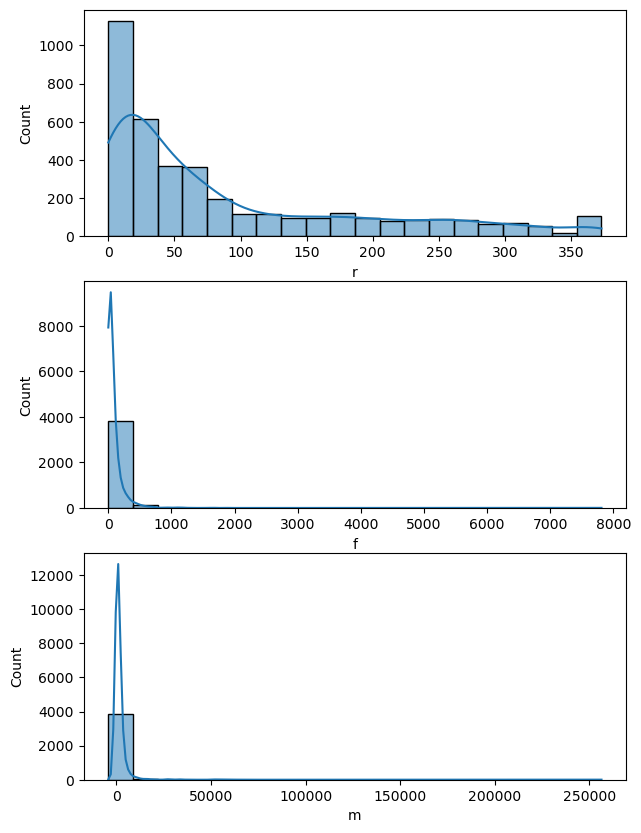

In [138]:
# Plot distribution
plt.figure(figsize=(7, 10))
plt.subplot(3, 1, 1)
sns.histplot(rfm["r"], kde=True, bins=20)

plt.subplot(3, 1, 2)
sns.histplot(rfm["f"], kde=True, bins=20)


plt.subplot(3, 1, 3)
sns.histplot(rfm["m"],kde=True, bins=20)

plt.show()

In [139]:
rfm[['r', 'f', 'm']].mean()

r      90.778481
f      90.310886
m    1708.140798
dtype: float64

In [140]:
rfm[['r', 'f', 'm']].std()

r     100.230349
f     216.804909
m    6548.935742
dtype: float64

In [141]:
from scipy.stats import yeojohnson 
df = pd.DataFrame()
df["CustomerID"] = rfm.index

for col in ['r', 'f', 'm']:
    y, lmbda = yeojohnson(rfm[col])
    df[col] = y

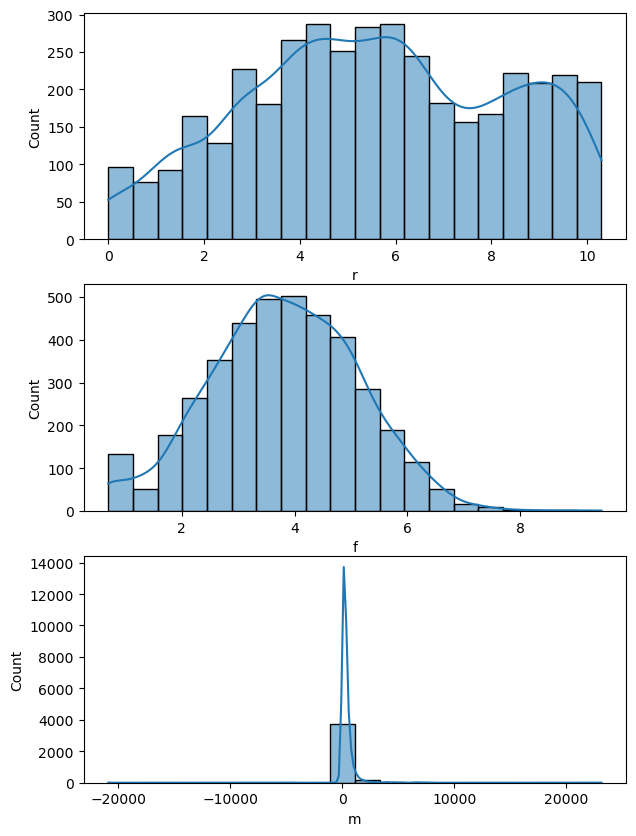

In [142]:
# Plot distribution
plt.figure(figsize=(7, 10))
plt.subplot(3, 1, 1)
sns.histplot(df["r"], kde=True, bins=20)

plt.subplot(3, 1, 2)
sns.histplot(df["f"], kde=True, bins=20)


plt.subplot(3, 1, 3)
sns.histplot(df["m"],kde=True, bins=20)

plt.show()

In [143]:
import sklearn.preprocessing as preproc

columns = ['r', 'f', 'm']

df[columns] = preproc.StandardScaler().fit_transform(df[columns])

In [144]:
df.head()

,CustomerID,r,f,m
0,12346.0,1.616963,-2.047845,-0.427779
1,12747.0,-1.800249,0.728819,0.658895
2,12748.0,-2.074125,3.799243,4.478003
3,12749.0,-1.491660,1.373104,0.591374
4,12820.0,-1.624220,0.290577,-0.093496


In [145]:
df.mean().astype(int)

CustomerID    15562
r                 0
f                 0
m                 0
dtype: int32

In [146]:
df.std().astype(int)

CustomerID    1576
r                1
f                1
m                1
dtype: int32

In [147]:
sse = {}

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df[columns])
    sse[k] = kmeans.inertia_

sse

{1: 11850.000000000004,
 2: 7511.111489691724,
 3: 5905.721959715831,
 4: 4872.0114293252955,
 5: 4158.157284770248,
 6: 3522.755254158978,
 7: 2913.763518652126,
 8: 2487.627682578605,
 9: 2141.0159948828336,
 10: 1934.9771586050256,
 11: 1781.363008156091,
 12: 1632.5615073292677,
 13: 1513.8395385494941,
 14: 1404.0954814893212}

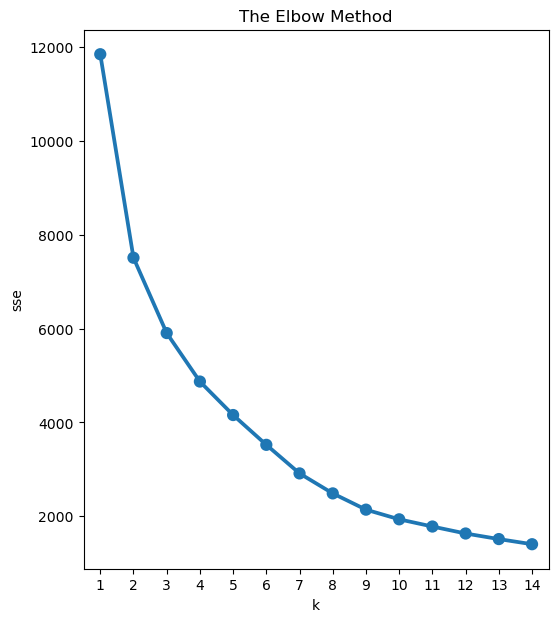

In [148]:
## Plot sum of squared errors
plt.figure(1 , figsize = (6, 7))
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')
# Add X-axis label "k"
plt.xlabel('k')
# Add Y-axis label "SSE"
plt.ylabel('sse')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

Best K value for this clustering should be 4.

In [149]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=1)

kmeans.fit(df[columns])

# Extract cluster labels
rfm['cluster_labels'] = kmeans.labels_
df['cluster_labels'] = kmeans.labels_

In [150]:
rfm.cluster_labels.value_counts()

2    1634
1    1281
3    1006
0      29
Name: cluster_labels, dtype: int64

In [151]:
rfm.groupby('cluster_labels').agg({
    'r': 'mean',
    'f': 'mean',
    'm': 'mean'})

,r,f,m
cluster_labels,,,
0,5.620690,1099.310345,55432.430345
1,206.514442,19.556596,378.735606
2,47.919829,48.705018,861.170595
3,15.473161,218.898608,3227.935000


In [152]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
points = pca.fit_transform(df[columns])

df['PC_1'] = points[:,0]
df['PC_2'] = points[:,1]

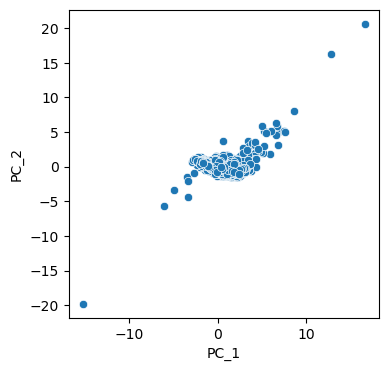

In [153]:
plt.figure(1 , figsize = (4, 4))
sns.scatterplot(x='PC_1', y='PC_2', data=df)
plt.show()

<AxesSubplot:xlabel='PC_1', ylabel='PC_2'>

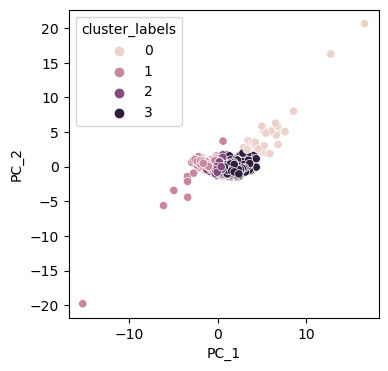

In [154]:
plt.figure(figsize = (4, 4))
sns.scatterplot(data=df,x='PC_1', y='PC_2', hue='cluster_labels')

In [155]:
df.head()

,CustomerID,r,f,m,cluster_labels,PC_1,PC_2
0,12346.0,1.616963,-2.047845,-0.427779,1,-2.442594,0.876132
1,12747.0,-1.800249,0.728819,0.658895,3,1.842503,-0.599984
2,12748.0,-2.074125,3.799243,4.478003,0,5.917858,1.881118
3,12749.0,-1.491660,1.373104,0.591374,3,2.032499,-0.573371
4,12820.0,-1.624220,0.290577,-0.093496,3,1.073431,-1.043698


In [181]:
df_melt = pd.melt(df, id_vars=['CustomerID', 'cluster_labels'],
                  value_vars=['r', 'f', 'm'],
                  var_name='Metric', value_name='Value')

In [184]:
df_melt.head()

,CustomerID,cluster_labels,Metric,Value
0,12346.0,1,r,1.616963
1,12747.0,3,r,-1.800249
2,12748.0,0,r,-2.074125
3,12749.0,3,r,-1.491660
4,12820.0,3,r,-1.624220


<AxesSubplot:xlabel='Metric', ylabel='Value'>

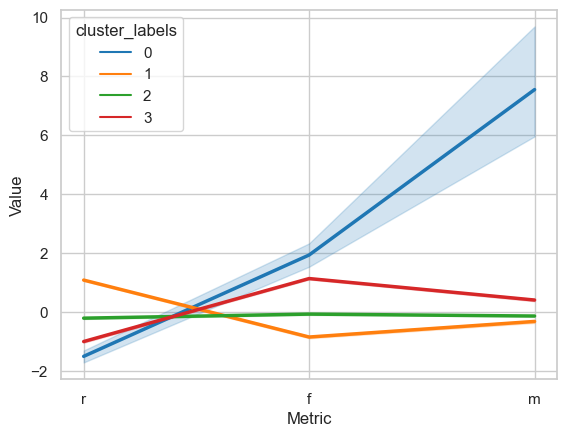

In [191]:
sns.set_theme(style="whitegrid")

sns.lineplot(data=df_melt,x='Metric',y='Value', palette="tab10", linewidth=2.5, hue='cluster_labels')

Group 0: Regular customer with high total price, but not regular anymore.
Group 1: They are new customer purchasing low priced products.
Group 2: They are regular customer having moderate recency, frequency, monetary value.
Group 3: Frequent customer consuming less price product.